In [6]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [18]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(6)
        self.relu1 = nn.ReLU()
        self.avgpool1 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(16)
        self.relu2 = nn.ReLU()
        self.avgpool2 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(16, 120, kernel_size=5)
        self.bn3 = nn.BatchNorm2d(120)
        self.relu3 = nn.ReLU()

        self.fc1 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout2d(p=0.5)

        self.fc2 = nn.Linear(84, 10)

        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.relu1(self.bn1(self.conv1(x)))
        x = self.avgpool1(x)
        x = self.relu2(self.bn2(self.conv2(x)))
        x = self.avgpool2(x)
        x = self.relu3(self.bn3(self.conv3(x)))
        x = self.flatten(x)
        x = self.dropout(self.relu4(self.fc1(x)))
        x = self.fc2(x)
        return x

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=200, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=200, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 98833302.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 6824546.13it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24676345.86it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14802275.66it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1345: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch [1/100], Train Loss: 2.2261, Train Accuracy: 20.31%, Test Loss: 2.1091, Test Accuracy: 42.70%
Epoch [2/100], Train Loss: 2.0403, Train Accuracy: 40.33%, Test Loss: 1.9276, Test Accuracy: 59.55%
Epoch [3/100], Train Loss: 1.8703, Train Accuracy: 52.08%, Test Loss: 1.7451, Test Accuracy: 66.29%
Epoch [4/100], Train Loss: 1.6995, Train Accuracy: 58.86%, Test Loss: 1.5553, Test Accuracy: 69.82%
Epoch [5/100], Train Loss: 1.5285, Train Accuracy: 63.48%, Test Loss: 1.3701, Test Accuracy: 72.78%
Epoch [6/100], Train Loss: 1.3671, Train Accuracy: 67.89%, Test Loss: 1.2034, Test Accuracy: 76.01%
Epoch [7/100], Train Loss: 1.2204, Train Accuracy: 71.77%, Test Loss: 1.0477, Test Accuracy: 80.35%
Epoch [8/100], Train Loss: 1.0910, Train Accuracy: 75.39%, Test Loss: 0.9197, Test Accuracy: 84.24%
Epoch [9/100], Train Loss: 0.9773, Train Accuracy: 78.62%, Test Loss: 0.7980, Test Accuracy: 87.47%
Epoch [10/100], Train Loss: 0.8769, Train Accuracy: 81.46%, Test Loss: 0.6993, Test Accuracy: 89.66%

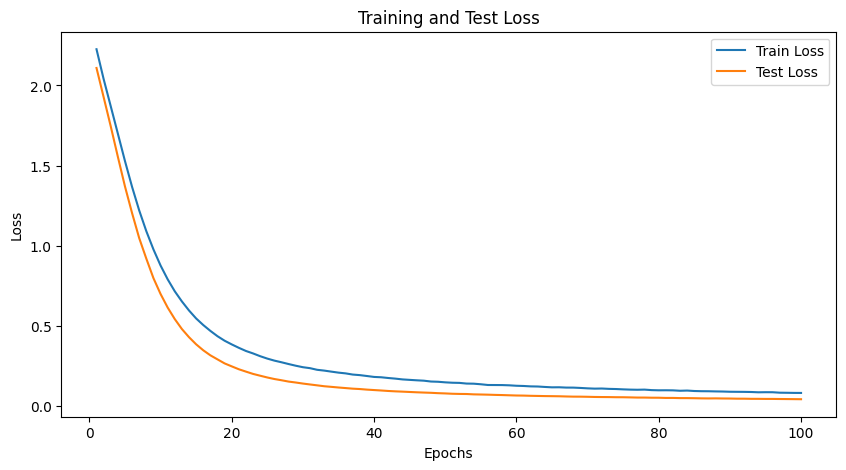

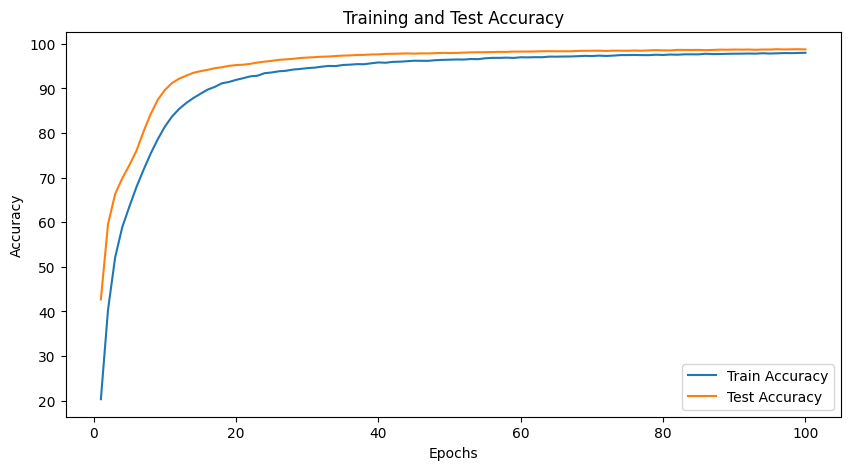

In [19]:
model = LeNet5()

learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # fine-tuning

# Training the model
num_epochs = 100
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total_train = 0
    running_train_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluate on test set
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)
    test_loss = running_test_loss / len(test_loader)
    test_losses.append(test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Plotting the training and test loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Plotting the training and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()